### Feeding Forward: 

This notebook covers how we code a neural network in PyTorch and feed data through. We'll be building a Neural Network to recognise digits using the MNIST dataset. I've previously built a neural network for this exact objective from scratch and this notebook will show how easy it is to build this model using PyTorch. 


In [1]:
from torch import nn 
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

Model Params:

In [3]:
input_size = 784
hidden_size = 25
output_size = 10
batch_size = 200
learning_rate = 0.001
epochs = 2

Import the training data from trochvision: 

In [8]:
train_data = torchvision.datasets.MNIST(root='./', download=True, train=True, 
                transform=torchvision.transforms.ToTensor())

test_data = torchvision.datasets.MNIST(root='./', download=True, 
                transform=torchvision.transforms.ToTensor())

print(f'Number of training Data: {len(train_data)}')
print(f'Number of testing Data: {len(test_data)}')



Number of training Data: 60000
Number of testing Data: 60000


Recall, dataset objects are parsed into DataLoaders. 

In [9]:
train_loader = DataLoader(dataset=train_data, batch_size=batch_size,shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

EDA: Viewing our data. We can use the iter method to iterate through our DataLoader to view some examples. Each "row" in the data loaders corresponds to a pair: datapoint, label. 

<class 'torch.Tensor'>


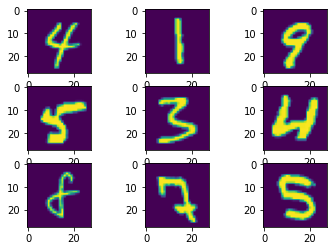

In [32]:
# Iterable object returns from iter. 
iterable = iter(train_loader)
sample = next(iterable)[0]
print(type(sample))
for i in range(1,10):
    plt.subplot(3,3,i)
    data = sample[i][0]
    plt.imshow(data)

Now we can build the framework of the Neural Network: 

- Creating Model Class by inheriting from nn.module. 
- Need to define the "forward" method, takes in a datapoint and returns the output after feeding forward. 